In [2]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

def posterior(a,b,X):
    a_n = a + X.sum()
    b_n = b + (X.shape[0]-X.sum())
    return beta.pdf(mu_test,a_n,b_n)

<Figure size 640x480 with 0 Axes>

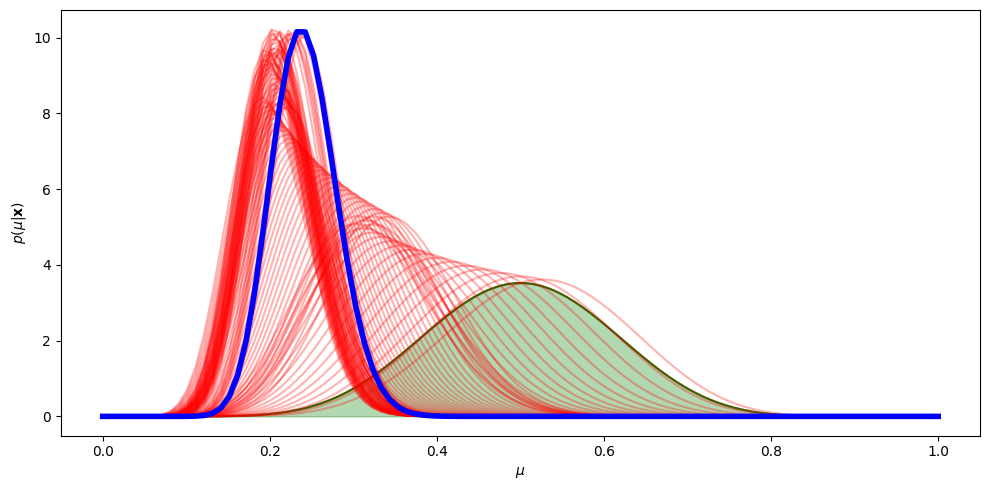

In [15]:
plt.clf()

# parameters to generate data
mu = 0.2
N = 100

# generate some data
X = np.random.binomial(1,mu,N)
mu_test = np.linspace(0,1,100)

# now lets define our prior
a = 10
b = 10

# p(mu) = Beta(alpha,beta)
prior_mu = beta.pdf(mu_test,a,b)

# create figure
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

# plot prior
ax.plot(mu_test,prior_mu,'g')
ax.fill_between(mu_test,prior_mu,color='green',alpha=0.3)
ax.set_xlabel('$\mu$')
ax.set_ylabel('$p(\mu|\mathbf{x})$')

# lets pick a random (uniform) point from the data
# and update our assumption with this
index = np.random.permutation(X.shape[0])
for i in range(0,X.shape[0]):
    y = posterior(a,b,X[:index[i]])
    plt.plot(mu_test,y,'r',alpha=0.3)

y = posterior(a,b,X)
plt.plot(mu_test,y,'b',linewidth=4.0)

# ignore this
plt.tight_layout()
# plt.savefig(path, transparent=True)
# return path

plt.show()

<Figure size 640x480 with 0 Axes>

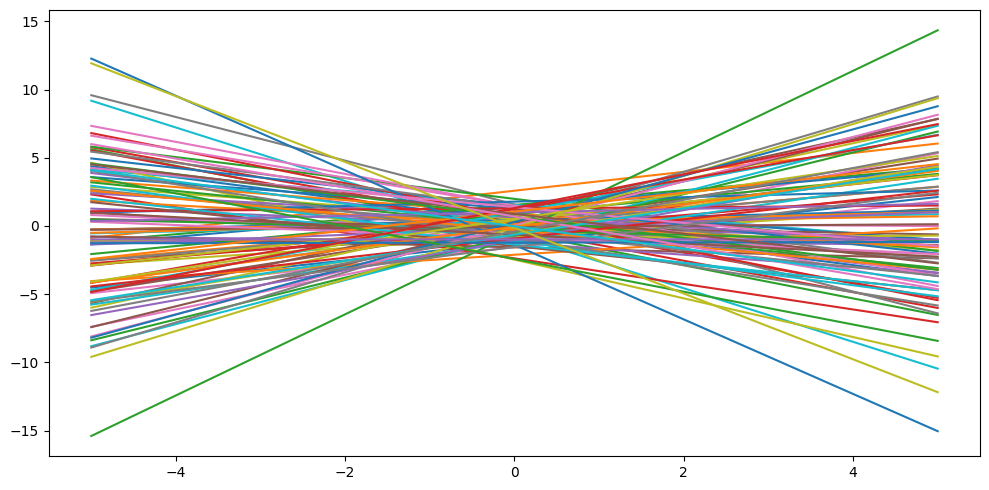

In [14]:
plt.clf()

X = None

def plot_line(ax, w):
    # input data
    X = np.zeros((2,2))
    X[0,0] = -5.0
    X[1,0] = 5.0
    X[:,1] = 1.0

    # because of the concatenation we have to flip the transpose
    y = w.dot(X.T)
    ax.plot(X[:,0], y)

    return X, y

# create prior distribution
tau = 1.0*np.eye(2)
w_0 = np.zeros((2,1))

# sample from prior
n_samples = 100
w_samp = np.random.multivariate_normal(w_0.flatten(), tau, size=n_samples)

# create plot
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

for i in range(0, w_samp.shape[0]):
    X, y = plot_line(ax, w_samp[i,:])

# save fig
plt.tight_layout()
# plt.savefig(path, transparent=True)
# return path

plt.show()

In [17]:
"""
Create a contour plot of a two-dimensional normal distribution
Parameters
----------
ax : axis handle to plot
mu : mean vector 2x1
Sigma : covariance matrix 2x2
"""
from scipy.stats import multivariate_normal
def plotdistribution(ax,mu,Sigma):
    plt.clf()
    x = np.linspace(-1.5,1.5,100)
    x1p, x2p = np.meshgrid(x,x)
    pos = np.vstack((x1p.flatten(), x2p.flatten())).T

    pdf = multivariate_normal(mu.flatten(), Sigma)
    Z = pdf.pdf(pos)
    Z = Z.reshape(100,100)

    ax.contour(x1p,x2p,Z, 5, colors='r', lw=5, alpha=0.7)
    ax.set_xlabel('w_0')
    ax.set_ylabel('w_1')

    plt.show()

In [18]:
index = np.random.permutation(X.shape[0])
for i in range(0, index.shape[0]):
    X_i = X[index,:]
    y_i = y[index]

    # compute posterior
    # visualise posterior
    # visualise samples from posterior with the data
    # print out the mean of the posterior